<a href="https://colab.research.google.com/github/sukha002/AIDI/blob/master/1002/lab/AIDI_1002_Week_4_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Supervised Learning - Questions

In [ ]:
import numpy as np
import pandas as pd

import math
from random import shuffle
import random
random.seed(0)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

givenDec = lambda gdVal: float('%.1f' % gdVal) # 1 digit
givenDec3 = lambda gdVal: float('%.3f' % gdVal) # 3 digit

### Classification

In [ ]:
# function to generate data points for family car example
def generateCarTypeData(gnPoints):
    
    engine_power_all = []
    price_all = []
    famCar_class = []

    for i in range(gnPoints):
        rnd_val = np.random.random()
        rnd_val_e = np.random.random()
        rnd_val_p = np.random.random()
        if(rnd_val < 0.5):
            famCar_class.append(0)
            tmp_eng_power = np.random.randint(low=50, high=240)
            tmp_price = np.random.randint(low=10, high=100)

            while (120<tmp_eng_power<180 and 25<tmp_price<50):
                tmp_eng_power = np.random.randint(low=50, high=240)
                tmp_price = np.random.randint(low=10, high=100)

            engine_power_all.append(tmp_eng_power)
            price_all.append(tmp_price)
        else:
            famCar_class.append(1)
            engine_power_all.append(np.random.randint(low=120, high=180))
            price_all.append(np.random.randint(low=25, high=50))

    tmp_df = pd.DataFrame({
        "e":engine_power_all,
        "p":price_all,
        "c":famCar_class
    })
    
    return tmp_df

In [ ]:
my_df = generateCarTypeData(gnPoints=40)
display(my_df.head())
display(my_df.info())

,e,p,c
0,217,12,0
1,137,53,0
2,211,70,0
3,160,24,0
4,158,45,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   e       40 non-null     int64
 1   p       40 non-null     int64
 2   c       40 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


None

A scatter plot of data points

<AxesSubplot:xlabel='e', ylabel='p'>

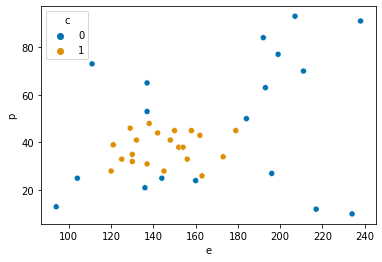

In [ ]:
#plt.scatter(my_df.e, my_df.p, marker='o');
sns.scatterplot(x="e", y="p", hue="c", data=my_df, palette="colorblind")

In [ ]:
# get the min price of a family car from the data set my_df
my_df[my_df['c']==1]['p'].min()

26

In [ ]:
# get the max price of a NON-family car that is smaller than minimum price of a family car
min_price = my_df[my_df['c']==1]['p'].min()
my_df[(my_df['c'] ==0) & (my_df['p'] < min_price)]['p'].max()

25

$\color{red}{\text{Hint:}}$ Implement a function that returns min/max price/engine power values that define a rectangle classifier

In [ ]:
# from 2D data, get the range values associated with a family car
def getRange_familyCar(gdf):
    min_price = gdf[gdf['c']==1]['p'].min()
    max_price = gdf[gdf['c']==1]['p'].max()
    min_engine = gdf[gdf['c']==1]['e'].min()
    max_engine = gdf[gdf['c']==1]['e'].max()
    
    return min_price, max_price, min_engine, max_engine

getRange_familyCar(my_df)

(26, 48, 120, 179)

$\color{red}{\text{Question:}}$ Implement a function that returns min/max price/engine power values that define the LARGEST rectangle classifier

In [ ]:
def getRange_familyCar_large(gdf):
    min_price = my_df[(my_df['c']==0) & (my_df['p'] < my_df[my_df['c']==1]['p'].min())]['p'].max()
    max_price = my_df[(my_df['c']==0) & (my_df['p'] > my_df[my_df['c']==1]['p'].max())]['p'].min()
    min_engine = my_df[(my_df['c']==0) & (my_df['e'] < my_df[my_df['c']==1]['e'].min())]['e'].max()
    max_engine = my_df[(my_df['c']==0) & (my_df['e'] > my_df[my_df['c']==1]['e'].max())]['e'].min()
    
    return min_price, max_price, min_engine, max_engine

$\color{red}{\text{Question:}}$ Implement a function that returns min/max price/engine power values that define a medium (between smallest and largest) rectangle classifier

In [ ]:
def getRange_familyCar_medium(gdf):
    a,b,c,d = getRange_familyCar(gdf)
    e,f,g,h = getRange_familyCar_large(gdf)
    min_price = (a+e)/2
    max_price = (b+f)/2
    min_engine = (c+g)/2
    max_engine = (d+h)/2
    
    return min_price, max_price, min_engine, max_engine

In [ ]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

min_p, max_p, min_e, max_e = getRange_familyCar_large(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

rectangle 26 48 120 179
rectangle 25 50 111 184
rectangle 25.5 49.0 115.5 181.5


In [ ]:
def classify_instance_byRectangle(min_price, max_price, min_engine, max_engine, gdf_instance):
    if(min_engine<gdf_instance.e<max_engine and min_price<gdf_instance.p<max_price):
        return 1
    else:
        return 0

In [ ]:
classify_instance_byRectangle(25, 46, 120, 179, my_df.iloc[0])

0

In [ ]:
# first row of the data set
my_df.iloc[0]

e    217
p     12
c      0
Name: 0, dtype: int64

$\color{red}{\text{Question:}}$ Implement a function that classifies a given data point using a circle classifier (obtained through data points that encapsulate family cars in the data set)

In [ ]:
def classify_instance_byCircle(min_price, max_price, min_engine, max_engine, gdf_instance):
    # center of circle
    x = (min_engine+max_engine)/2
    y = (min_price+max_price)/2
    # radius
    r = (max_engine-min_engine)/2
    rr = (max_price-min_price)/2
    if r < rr:
        r = rr
    # compare distance with center of circle
    if (math.sqrt((abs(x-gdf_instance.e)**2)+(abs(y-gdf_instance.p))**2) <= r):
        return 1
    else:
        return 0

$\color{red}{\text{Question:}}$ Implement a function that classifies a given data point using a ellipsoid classifier (obtained through data points that encapsulate family cars in the data set)

In [ ]:
def classify_instance_byEllipsoid(min_price, max_price, min_engine, max_engine, gdf_instance):
    
    h = (min_engine+max_engine)/2
    k = (min_price+max_price)/2
    
    a = (max_engine-min_engine)/2
    b = (max_price-min_price)/2
    
    p = ((math.pow((gdf_instance.e - h), 2) // math.pow(a, 2)) + (math.pow((gdf_instance.p - k), 2) // math.pow(b, 2)))
    if (p <= 1):
        return 1
    else:
        return 0

In [ ]:
test_df = generateCarTypeData(gnPoints=20) # you might want to try different test set sizes

In [ ]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 26 48 120 179
[0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]
[0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1]
d_accuracy 0.95


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_large() function is used for obtaining the boundaries for family cars and classify_instance_byRectangle() function is used for classifying the instances in the test set

In [ ]:
min_p, max_p, min_e, max_e = getRange_familyCar_large(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 25 50 111 184
[0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]
[0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]
d_accuracy 1.0


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byRectangle() function is used for classifying the instances in the test set

In [ ]:
min_p, max_p, min_e, max_e = getRange_familyCar_medium(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

rectangle 25.5 49.0 115.5 181.5
[0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]
[0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]
d_accuracy 1.0


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byCircle() function is used for classifying the instances in the test set

In [ ]:
min_p, max_p, min_e, max_e =  getRange_familyCar_medium(my_df)
print("circle",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byCircle(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

circle 25.5 49.0 115.5 181.5
[0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]
[0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]
d_accuracy 1.0


$\color{red}{\text{Question:}}$ What is the classification accuracy when getRange_familyCar_medium() function is used for obtaining the boundaries for family cars and classify_instance_byEllipsoid() function is used for classifying the instances in the test set

In [ ]:
min_p, max_p, min_e, max_e =  getRange_familyCar_medium(my_df)
print("ellipsoid",min_p, max_p, min_e, max_e)

test_labels = np.array(test_df.c)
test_predict = []
for i in range(len(test_df)):
    test_predict.append(classify_instance_byEllipsoid(min_p, max_p, min_e, max_e, test_df.iloc[i]))

print(np.array(test_labels))
print(np.array(test_predict))
# print(test_df)

d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

ellipsoid 25.5 49.0 115.5 181.5
[0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]
[0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]
d_accuracy 1.0


### Regression

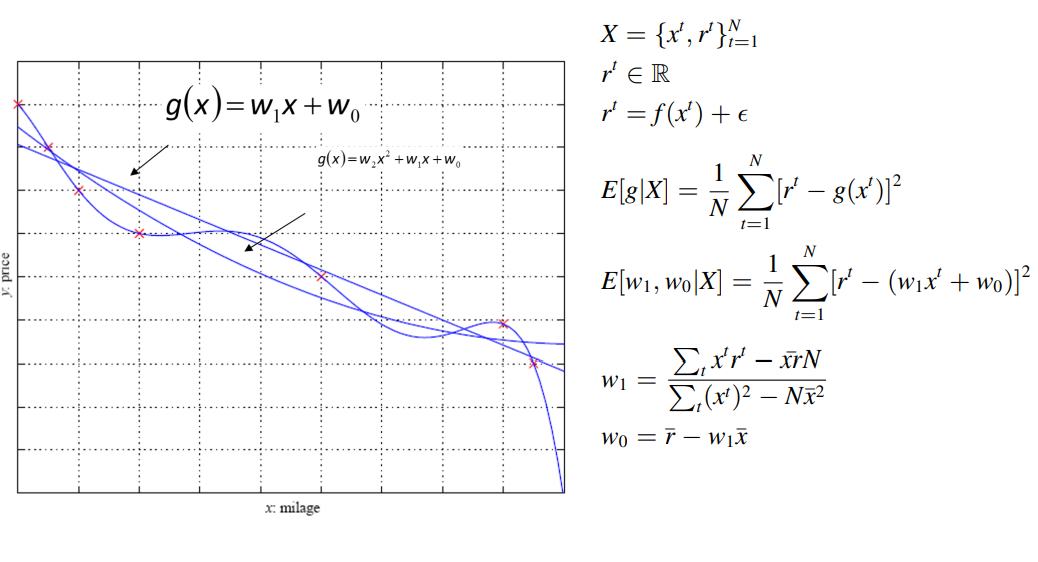

$\color{red}{\text{Question:}}$ Given a set of actual labels (gLabels) and predicted labels (gPredictedLabels), implement a function that returns RMSE

In [ ]:
def getRMSE(gLabels, gPredictedLabels):
    RMSE = math.sqrt(np.square(np.subtract(gLabels,gPredictedLabels)).mean())
    return RMSE

A function that generates data points according to the equation (r = mx + b + noise) where m=2.25, b = 6, and noise$\sim N(0,1.21)$

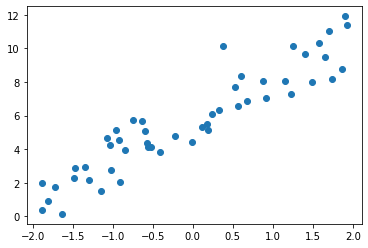

In [ ]:
n_points = 50

b = 6 # intercept
m = 2.25 # slope
noise_mean = 0.0
noise_var = 1.21

X = []
r = []
for i in range(n_points):
    #rnd_num = random.random()
    rnd_num = np.random.uniform(-2, 2)
    X.append(rnd_num)
    r.append(b + m*rnd_num + np.random.normal(loc=noise_mean, scale=noise_var))

plt.scatter(X, r, marker='o');

$\color{red}{\text{Question:}}$ Calculate $w_0$ and $w_1$ values in linear regression equation $r = w_0+w_1*x$ based on the closed form expressions in the lecture notes.

In [ ]:
x = np.array(X)
y = np.array(r)
n = np.size(x)

# mean of x and y vector
meanX = np.mean(x)
meanY = np.mean(y)

# calculating cross-deviation and deviation about x
SS_xy = np.sum(y*x) - n*meanY*meanX
SS_xx = np.sum(x*x) - n*meanX*meanX

# calculating regression coefficients
w_1 = SS_xy / SS_xx
w_0 = meanY - w_1*meanX

$\color{red}{\text{Question:}}$ Report the error with the calculated w_1 and w_0.

Hint: Use getRMSE() function that you have implemented

In [ ]:
# Report the error with the calculated w_1 and w_0

y_pred = w_1 * np.array(X) + w_0
print('RMSE:', getRMSE(y, y_pred))

RMSE: 1.098061330330995


$\color{red}{\text{Question:}}$ Plot the data points along with the fitted line.

Hint: Use mathplotlib library's plot function

Text(0, 0.5, 'p')

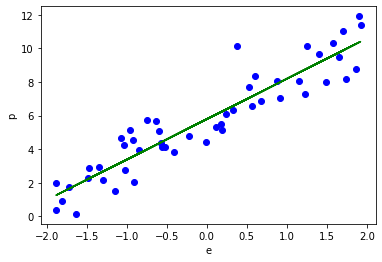

In [ ]:
# Plot the data points along with the fitted line
import matplotlib.pyplot as plt
  
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'green')
plt.xlabel('e')
plt.ylabel('p')

using library functions for linear regression

In [ ]:
xx = np.array(X)
rr = np.array(r)

# transforming the data to include another axis
xx = xx[:, np.newaxis]
rr = rr[:, np.newaxis]

# sklearn linear regression function
model = LinearRegression()
model.fit(xx, rr)
r_pred = model.predict(xx)

# The coefficients + Intercept
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

RMSE = getRMSE(rr, r_pred)
print("RMSE",RMSE)

# insert codes for plotting the fitted function

Intercept: 
 [5.79128728]
Coefficients: 
 [[2.40224672]]
RMSE 1.098061330330995


using library functions for polynomial regression

In [ ]:
import operator
from sklearn.preprocessing import PolynomialFeatures

def polyFit(gxx, grr, gnDegree):

    polynomial_features= PolynomialFeatures(degree=gnDegree)
    x_poly = polynomial_features.fit_transform(gxx)

    model = LinearRegression()
    model.fit(x_poly, grr)
    r_poly_pred = model.predict(x_poly)

    # The coefficients + Intercept
    print('Intercept: \n', model.intercept_)
    print('Coefficients: \n', model.coef_)
    
    RMSE = getRMSE(gxx, r_poly_pred)
    print('RMSE',RMSE)

    plt.scatter(gxx, grr, s=10)

    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(gxx,r_poly_pred), key=sort_axis)
    gxx, r_poly_pred = zip(*sorted_zip)
    plt.plot(gxx, r_poly_pred, color='m')
    plt.show()
    
    return model.intercept_, model.coef_

Intercept: 
 [5.83160527]
Coefficients: 
 [[ 0.          2.40514343 -0.02947881]]
RMSE 5.957339144158386


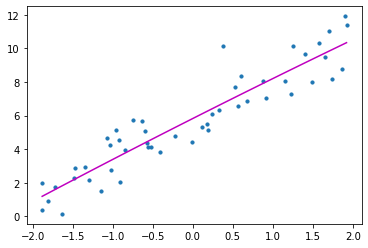

(array([5.83160527]), array([[ 0.        ,  2.40514343, -0.02947881]]))

In [ ]:
xx = np.array(X)
rr = np.array(r)

# transforming the data to include another axis
xx = xx[:, np.newaxis]
rr = rr[:, np.newaxis]

polyFit(xx, rr, gnDegree=2)

Intercept: 
 [5.4629065]
Coefficients: 
 [[ 0.          2.39221997  1.68883462 -0.10618666 -1.29975681  0.04188096
   0.24278041]]
RMSE 5.9647009398224835


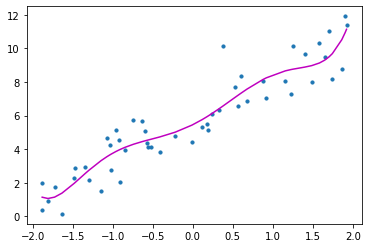

(array([5.4629065]),
 array([[ 0.        ,  2.39221997,  1.68883462, -0.10618666, -1.29975681,
          0.04188096,  0.24278041]]))

In [ ]:
polyFit(xx, rr, gnDegree=6)

Intercept: 
 [5.81458834]
Coefficients: 
 [[ 0.          2.10276711 -0.03365454  0.12569513]]
RMSE 5.9592620595855506


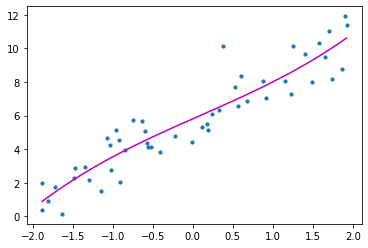

(array([5.81458834]),
 array([[ 0.        ,  2.10276711, -0.03365454,  0.12569513]]))

In [ ]:
polyFit(xx, rr, gnDegree=3)